In [19]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Gate
from qiskit.circuit import Parameter

In [15]:
def res_block(l_gate: Gate, data: QuantumRegister):
    anc = QuantumRegister(1, '0')
    qc = QuantumCircuit(anc, data)

    qc.h(anc[0])
    controlled_l = l_gate.control()
    
    qc.append(controlled_l, [anc[0]] + list(data))

    qc.h(anc[0])
    return qc


In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Gate, Parameter

def res_block_r1(l_gate: Gate, data: QuantumRegister):
    # Define registers
    anc = QuantumRegister(1, 'anc')   # Ancilla qubit
    c = ClassicalRegister(1, 'c')     # Classical register for ancilla measurement
    qc = QuantumCircuit(anc, data, c)

    # Define trainable parameter alpha
    alpha = Parameter('α')

    # Step 1: Apply Ry(2α) instead of Hadamard
    qc.ry(2 * alpha, anc[0])

    # Step 2: Apply controlled-L(⋄)
    controlled_l = l_gate.control()
    qc.append(controlled_l, [anc[0]] + list(data))

    # Step 3: Apply Hadamard on ancilla (optional — for more general form, use Ry(2β))
    qc.h(anc[0])

    # Step 4: Measure ancilla
    # qc.measure(anc[0], c[0])

    return qc


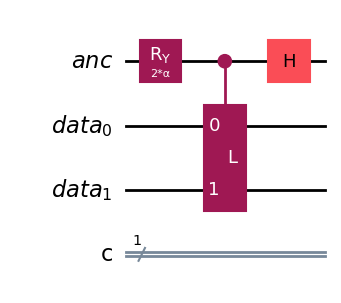

In [18]:
data = QuantumRegister(2, 'data')

# Create 2-qubit gate: H on qubit 0, CNOT between 0 and 1
qc_l = QuantumCircuit(2)
qc_l.h(0)

qc_l.cx(0, 1)
l_gate = qc_l.to_gate(label="L")

qc = res_block_r1(l_gate, data)
qc.draw("mpl")


In [22]:
from qiskit.quantum_info import Statevector

alpha = list(qc.parameters)[0]
qc = qc.assign_parameters({alpha: 3.14/4})
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>